# Rounding k-NN : A clustering method

In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy import sparse
import numba

In [3]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris

In [4]:
from sklearn.utils.random import sample_without_replacement

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [6]:
from sklearn.neighbors import NearestNeighbors, NearestCentroid
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler, KernelCenterer

In [7]:
from sklearn.metrics import adjusted_mutual_info_score, mean_squared_error, matthews_corrcoef, mean_absolute_error

In [8]:
from collections import OrderedDict

In [9]:
from timeit import default_timer as timer

In [10]:
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [1]:
import lda

In [11]:
%load_ext Cython

In [13]:
def get_data(dataname):
    
    if dataname == 'iris':
        data = load_iris()
    elif dataname == 'boston':
        data = load_boston()
    elif dataname == 'cancer':
        data = load_breast_cancer()
    df  = pd.concat([pd.DataFrame(data.data),pd.DataFrame(data.target)],axis = 1)
    names = [i for i in data.feature_names]
    names.append('target')
    df.columns = names
    print(df.head())
    print(df.describe())
    return df

In [14]:
df = get_data('boston')

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    

In [15]:
df.shape

(506, 14)

In [16]:
def freq_count(a,axis=0,p=100):
    pass


def get_scores(d,is_nan = False):
    if np.any(np.isnan(d)) or is_nan:
        return np.nanmean(d),np.nanstd(d), np.nanmin(d), np.nanmedian(d), np.nanmax(d)
    else:
        return np.mean(d),np.std(d), np.min(d), np.median(d), np.max(d)


In [17]:
k = 2; X = df.iloc[:,:13].values

In [20]:
mod = NearestNeighbors(n_neighbors=k,n_jobs=-1).fit(X)

In [21]:
d,i = mod.kneighbors(X)
d = d[:,1:k]
i = i[:,1:k]

In [22]:
np.unique(i.flatten()).shape,np.bincount(i.flatten())

((354,),
 array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 2,
        2, 0, 3, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0,
        0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
        0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2,
        1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0,
        1, 1, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0,
        0, 2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
        1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2,
        0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 3, 0, 1,
        3, 2, 1, 1, 1, 1, 0, 0, 3, 2, 3, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1,
        0, 2, 0, 0, 2, 2, 0, 

In [23]:
np.percentile(np.bincount(i.flatten()),q=np.arange(0,100,10))

array([0. , 0. , 0. , 0.5, 1. , 1. , 1. , 1. , 2. , 2. ])

In [24]:
np.percentile(freq_count(i.flatten())[:,1],q=50)

1.0

In [25]:
np.sum(freq_count(i.flatten())[:,1] >= np.percentile(freq_count(i.flatten())[:,1],q=50))

354

In [26]:
df = get_data('cancer')

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0          

In [27]:
X = MinMaxScaler(feature_range=(-10,10)).fit_transform(df.iloc[:,:30])

In [28]:
X = RobustScaler(quantile_range=(0.2,0.8)).fit_transform(df.iloc[:,:13])

In [29]:
X = StandardScaler().fit_transform(df.iloc[:,:30])

In [30]:
max_k = 21
mod = NearestNeighbors(n_neighbors=max_k, algorithm='kd_tree', n_jobs=-1).fit(X)
d_k,i_k = mod.kneighbors(X)

In [31]:
conf_q=25; at_k=False; granual_k=5; maxit=5

In [32]:

perc = []
d_desc = []
i_conf_perc = []
d_conf_desc = []
n = X.shape[0]

for k in range(2,max_k):
    d = d_k[:,1:k].copy()
    i = i_k[:,1:k].copy()
    p = np.unique(i.flatten()).shape[0]
    perc.append(p/n)
    f = freq_count(i.flatten())
    q = f[:,1] >= np.percentile(f[:,1], q=conf_q)
    i_conf_perc.append(np.sum(q)/n)
    func_f = np.vectorize(lambda x: np.all(f[q] != x))
    print('At: {} Neigh Pts: {} Confidence Neigh Pts: {}'.format(k,p,np.sum(q)))
    d_desc.append(get_scores(d[:,k-2] if at_k else d))
    np.place(d,func_f(i),np.nan)
    d_conf_desc.append(get_scores(d[:,k-2] if at_k else d,is_nan=True))

At: 2 Neigh Pts: 333 Confidence Neigh Pts: 333
At: 3 Neigh Pts: 450 Confidence Neigh Pts: 450
At: 4 Neigh Pts: 501 Confidence Neigh Pts: 389
At: 5 Neigh Pts: 520 Confidence Neigh Pts: 453
At: 6 Neigh Pts: 532 Confidence Neigh Pts: 415
At: 7 Neigh Pts: 545 Confidence Neigh Pts: 447
At: 8 Neigh Pts: 552 Confidence Neigh Pts: 414
At: 9 Neigh Pts: 553 Confidence Neigh Pts: 445
At: 10 Neigh Pts: 555 Confidence Neigh Pts: 419
At: 11 Neigh Pts: 557 Confidence Neigh Pts: 442
At: 12 Neigh Pts: 561 Confidence Neigh Pts: 426
At: 13 Neigh Pts: 562 Confidence Neigh Pts: 452
At: 14 Neigh Pts: 562 Confidence Neigh Pts: 438
At: 15 Neigh Pts: 562 Confidence Neigh Pts: 423
At: 16 Neigh Pts: 562 Confidence Neigh Pts: 436
At: 17 Neigh Pts: 562 Confidence Neigh Pts: 426
At: 18 Neigh Pts: 563 Confidence Neigh Pts: 438
At: 19 Neigh Pts: 564 Confidence Neigh Pts: 435
At: 20 Neigh Pts: 564 Confidence Neigh Pts: 423


In [33]:
def plot_k_dist(prec, i_conf_perc, d_desc, d_conf_desc, at_k=False, iteration=None):
    
    d_desc = np.array(d_desc)
    d_conf_desc = np.array(d_conf_desc)
    max_k = d_desc.shape[0]+2
    
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    plt.plot(range(2,max_k),perc,color='red',label='perc')
    plt.plot(range(2,max_k),i_conf_perc,color='black',label='conf_perc_{}'.format(conf_q))
    plt.legend()
    plt.xlabel('Values of K')
    plt.ylabel('% Data required by K')
    plt.title('% Reduction by Occurence vs K on Data',size=16)
    plt.xticks(range(2,max_k))

    plt.subplot(2,2,2)
    plt.plot(range(2,max_k),d_desc[:,0],color='skyblue',label='avg')
    plt.plot(range(2,max_k),d_desc[:,3],color='blue',label='med')
    plt.plot(range(2,max_k),d_desc[:,2],color='yellow',label='min')
    plt.plot(range(2,max_k),d_desc[:,4],color='orange',label='max')
    plt.plot(range(2,max_k),d_conf_desc[:,0],color='skyblue',linestyle='dashed',label='avg_conf')
    plt.plot(range(2,max_k),d_conf_desc[:,3],color='blue',linestyle='dashed',label='med_conf')
    plt.plot(range(2,max_k),d_conf_desc[:,2],color='yellow',linestyle='dashed',label='min_conf')
    plt.plot(range(2,max_k),d_conf_desc[:,4],color='orange',linestyle='dashed',label='max_conf')
    plt.xlabel('Values of K')
    plt.ylabel('Distance')
    plt.title('Distance Distribution vs K on Data {}'.format('considering values at K' if not at_k else ''),size=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(range(2,max_k))

    plt.subplot(2,2,3)
    plt.plot(range(2,max_k),d_desc[:,1],color='skyblue',label='std')
    plt.plot(range(2,max_k),d_conf_desc[:,1],color='blue',linestyle='dashed',label='std_conf')
    plt.legend()
    plt.xlabel('Values of K')
    plt.ylabel('Stadarad Deviation in Distance')
    plt.title('Stadarad Deviation of Distance vs K on Data {}'.format('considering values at K' if at_k else ''),size=16)
    plt.xticks(range(2,max_k))

    plt.subplot(2,2,4)
    plt.plot(range(2,max_k),d_desc[:,1]/d_desc[:,0],color='skyblue',label='coeff_var')
    plt.plot(range(2,max_k),d_conf_desc[:,1]/d_conf_desc[:,0],color='blue',linestyle='dashed',label='coeff_var_conf')
    plt.xlabel('Values of K')
    plt.ylabel('Coeff. of Varaitaion of Distance')
    plt.title('Coeff. of Varaitaion of Distance vs K on Data {}'.format('considering values at K' if at_k else ''),size=16)
    plt.legend()
    plt.xticks(range(2,max_k))

    plt.suptitle('Distance Behavior across K on Data {}'.format('at iteration {}'.format(iteration) if iteration is not None else ''),size=20)
    plt.show()

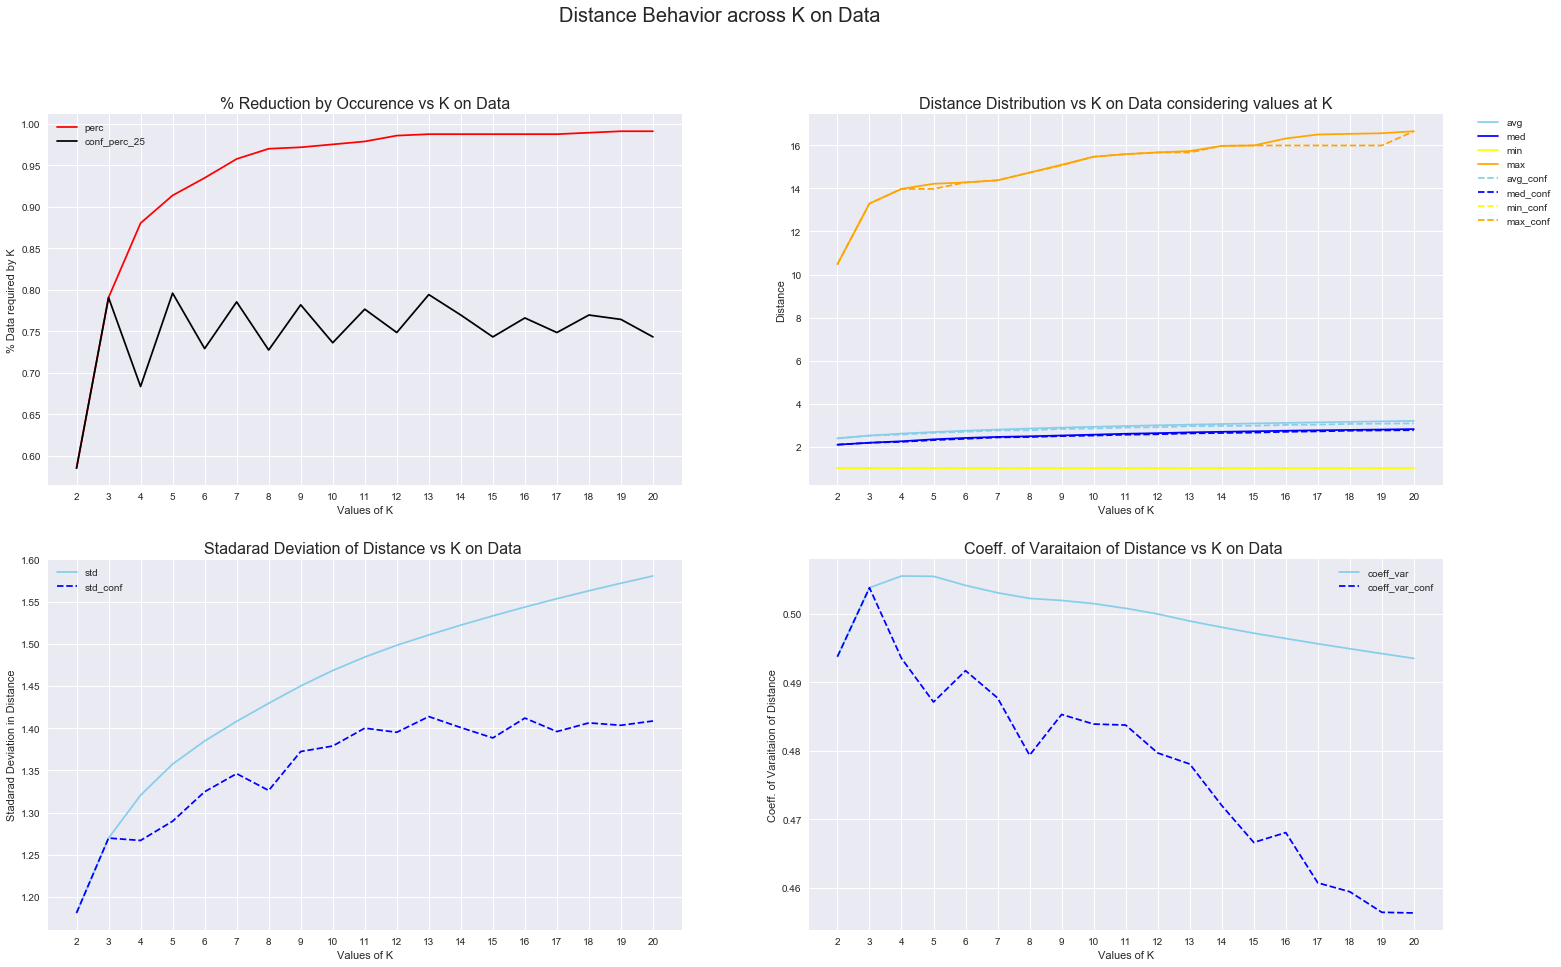

In [34]:
plot_k_dist(perc,i_conf_perc,d_desc,d_conf_desc)

Iteration:  1 At:  2 Neigh Pts: 450 Confidence Neigh Pts: 450 (569, 2)
Iteration:  1 At:  3 Neigh Pts: 501 Confidence Neigh Pts: 389 (569, 3)
Iteration:  1 At:  4 Neigh Pts: 520 Confidence Neigh Pts: 453 (569, 4)
Iteration:  1 At:  5 Neigh Pts: 532 Confidence Neigh Pts: 415 (569, 5)
Iteration:  1 At:  6 Neigh Pts: 545 Confidence Neigh Pts: 447 (569, 6)
Iteration:  1 At:  7 Neigh Pts: 552 Confidence Neigh Pts: 414 (569, 7)
Iteration:  1 At:  8 Neigh Pts: 553 Confidence Neigh Pts: 445 (569, 8)
Iteration:  1 At:  9 Neigh Pts: 555 Confidence Neigh Pts: 419 (569, 9)
Iteration:  1 At: 10 Neigh Pts: 557 Confidence Neigh Pts: 442 (569, 10)
Iteration:  1 At: 11 Neigh Pts: 561 Confidence Neigh Pts: 426 (569, 11)
Iteration:  1 At: 12 Neigh Pts: 562 Confidence Neigh Pts: 452 (569, 12)
Iteration:  1 At: 13 Neigh Pts: 562 Confidence Neigh Pts: 438 (569, 13)
Iteration:  1 At: 14 Neigh Pts: 562 Confidence Neigh Pts: 423 (569, 14)
Iteration:  1 At: 15 Neigh Pts: 562 Confidence Neigh Pts: 436 (569, 15)


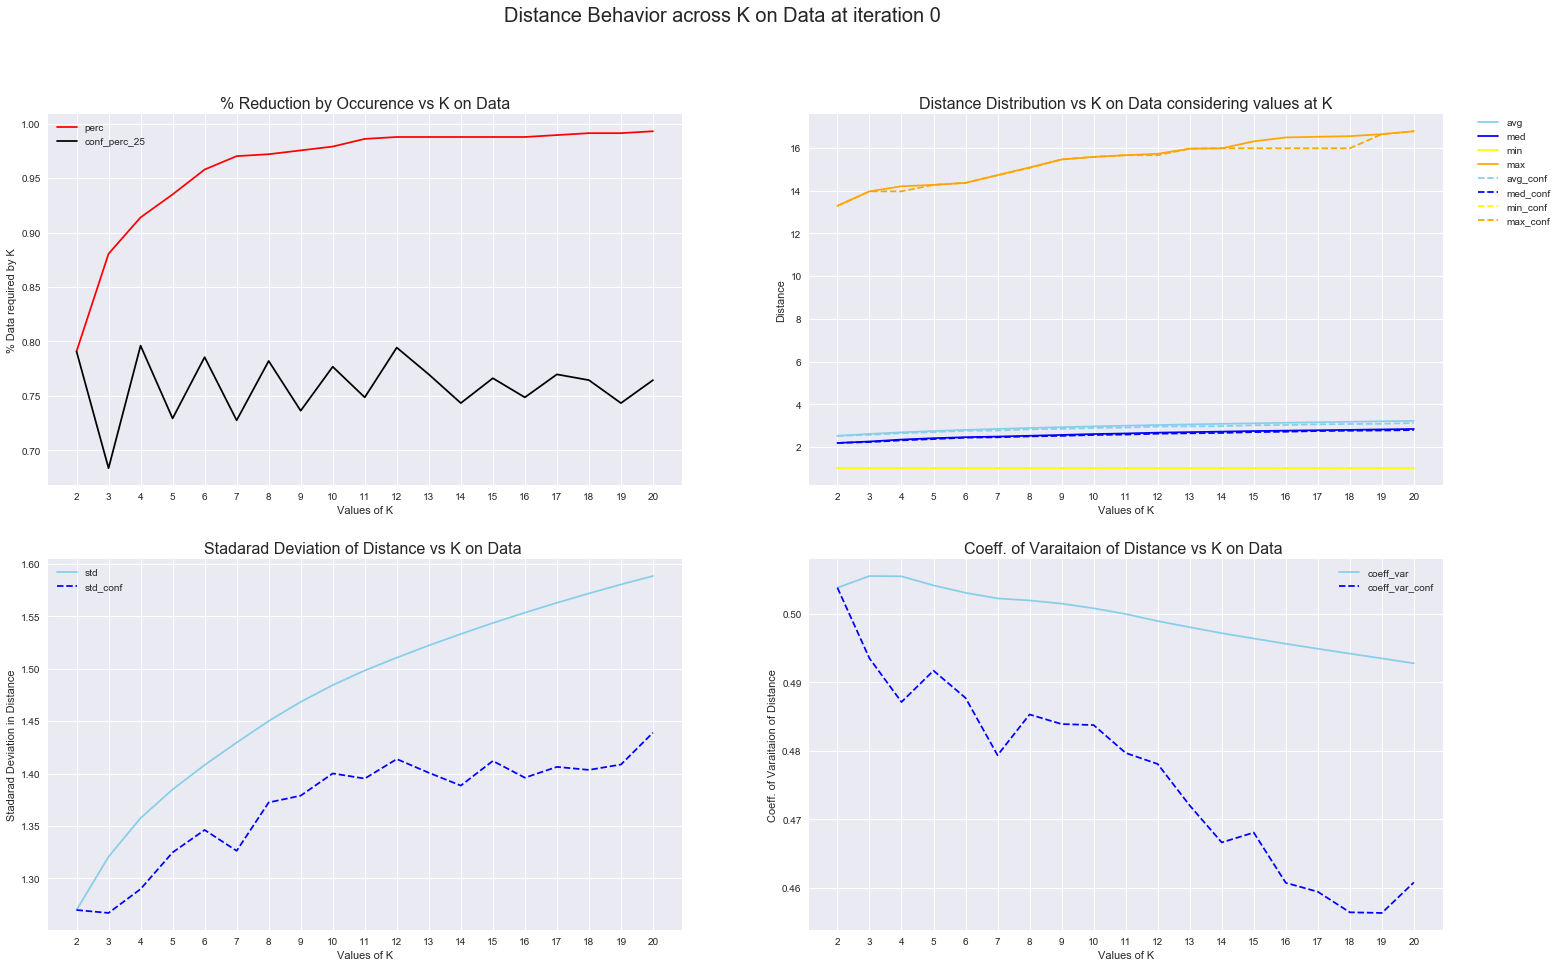

Iteration:  2 At:  2 Neigh Pts: 389 Confidence Neigh Pts: 340 (569, 2)
Iteration:  2 At:  3 Neigh Pts: 389 Confidence Neigh Pts: 351 (569, 3)
Iteration:  2 At:  4 Neigh Pts: 389 Confidence Neigh Pts: 328 (569, 4)
Iteration:  2 At:  5 Neigh Pts: 389 Confidence Neigh Pts: 304 (569, 5)
Iteration:  2 At:  6 Neigh Pts: 389 Confidence Neigh Pts: 311 (569, 6)
Iteration:  2 At:  7 Neigh Pts: 389 Confidence Neigh Pts: 308 (569, 7)
Iteration:  2 At:  8 Neigh Pts: 389 Confidence Neigh Pts: 301 (569, 8)
Iteration:  2 At:  9 Neigh Pts: 389 Confidence Neigh Pts: 301 (569, 9)
Iteration:  2 At: 10 Neigh Pts: 389 Confidence Neigh Pts: 299 (569, 10)
Iteration:  2 At: 11 Neigh Pts: 389 Confidence Neigh Pts: 298 (569, 11)
Iteration:  2 At: 12 Neigh Pts: 389 Confidence Neigh Pts: 295 (569, 12)
Iteration:  2 At: 13 Neigh Pts: 389 Confidence Neigh Pts: 296 (569, 13)
Iteration:  2 At: 14 Neigh Pts: 389 Confidence Neigh Pts: 297 (569, 14)
Iteration:  2 At: 15 Neigh Pts: 389 Confidence Neigh Pts: 293 (569, 15)


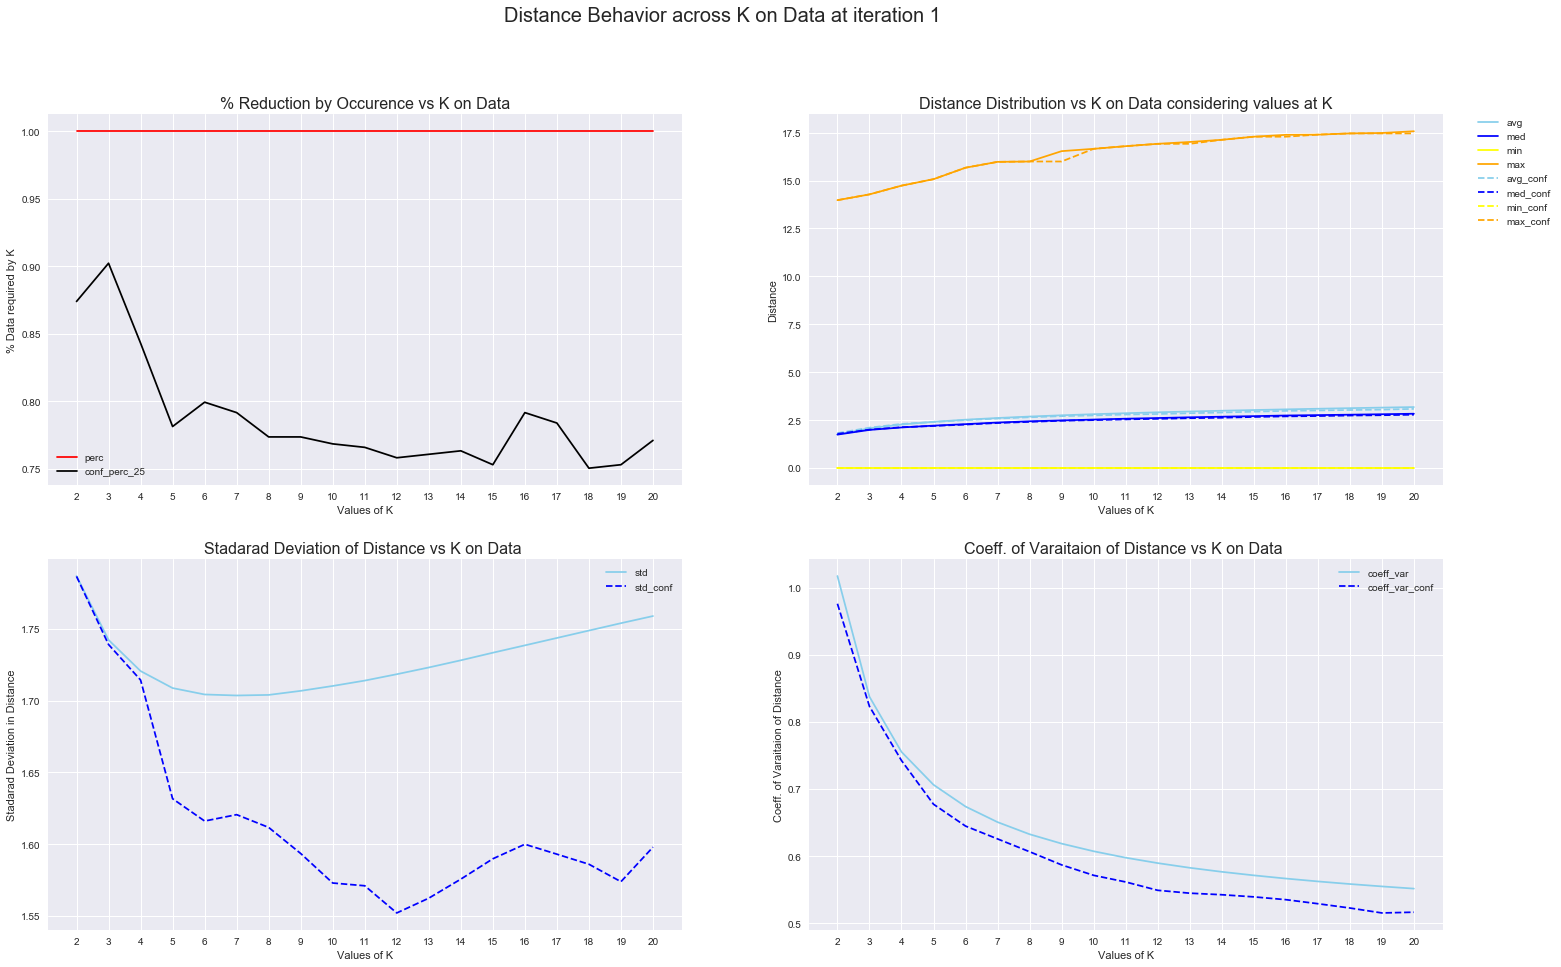

Iteration:  3 At:  2 Neigh Pts: 309 Confidence Neigh Pts: 243 (569, 2)
Iteration:  3 At:  3 Neigh Pts: 309 Confidence Neigh Pts: 266 (569, 3)
Iteration:  3 At:  4 Neigh Pts: 309 Confidence Neigh Pts: 256 (569, 4)
Iteration:  3 At:  5 Neigh Pts: 309 Confidence Neigh Pts: 237 (569, 5)
Iteration:  3 At:  6 Neigh Pts: 309 Confidence Neigh Pts: 243 (569, 6)
Iteration:  3 At:  7 Neigh Pts: 309 Confidence Neigh Pts: 252 (569, 7)
Iteration:  3 At:  8 Neigh Pts: 309 Confidence Neigh Pts: 235 (569, 8)
Iteration:  3 At:  9 Neigh Pts: 309 Confidence Neigh Pts: 237 (569, 9)
Iteration:  3 At: 10 Neigh Pts: 309 Confidence Neigh Pts: 234 (569, 10)
Iteration:  3 At: 11 Neigh Pts: 309 Confidence Neigh Pts: 240 (569, 11)
Iteration:  3 At: 12 Neigh Pts: 309 Confidence Neigh Pts: 242 (569, 12)
Iteration:  3 At: 13 Neigh Pts: 309 Confidence Neigh Pts: 234 (569, 13)
Iteration:  3 At: 14 Neigh Pts: 309 Confidence Neigh Pts: 238 (569, 14)
Iteration:  3 At: 15 Neigh Pts: 309 Confidence Neigh Pts: 232 (569, 15)


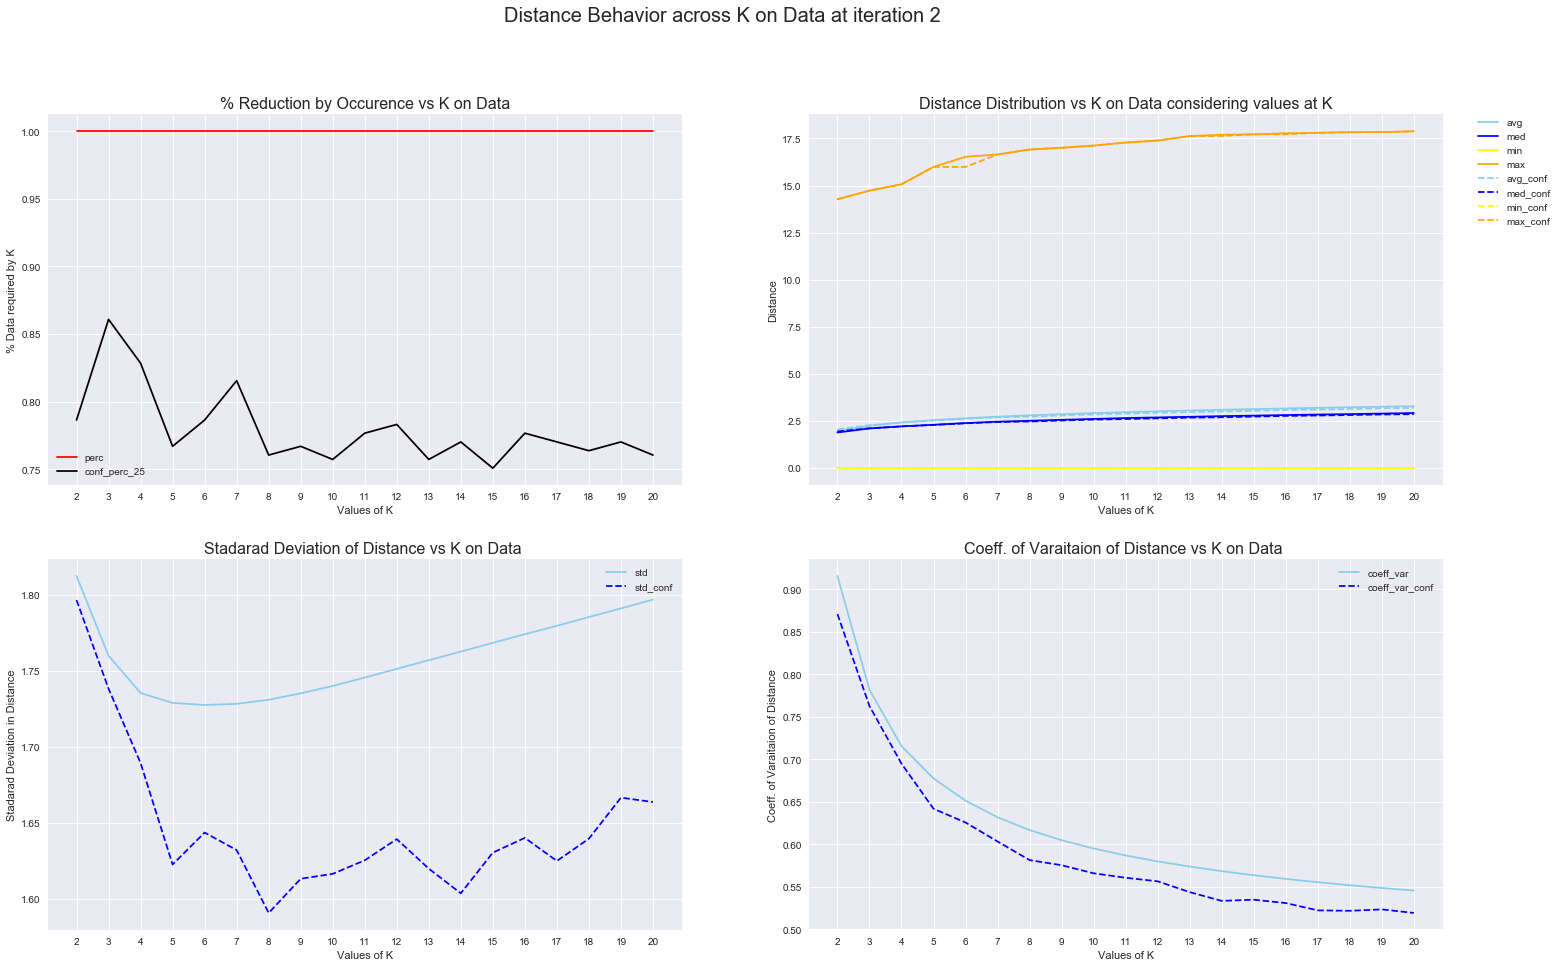

Iteration:  4 At:  2 Neigh Pts: 291 Confidence Neigh Pts: 232 (569, 2)
Iteration:  4 At:  3 Neigh Pts: 291 Confidence Neigh Pts: 262 (569, 3)
Iteration:  4 At:  4 Neigh Pts: 291 Confidence Neigh Pts: 219 (569, 4)
Iteration:  4 At:  5 Neigh Pts: 291 Confidence Neigh Pts: 240 (569, 5)
Iteration:  4 At:  6 Neigh Pts: 291 Confidence Neigh Pts: 226 (569, 6)
Iteration:  4 At:  7 Neigh Pts: 291 Confidence Neigh Pts: 231 (569, 7)
Iteration:  4 At:  8 Neigh Pts: 291 Confidence Neigh Pts: 219 (569, 8)
Iteration:  4 At:  9 Neigh Pts: 291 Confidence Neigh Pts: 221 (569, 9)
Iteration:  4 At: 10 Neigh Pts: 291 Confidence Neigh Pts: 222 (569, 10)
Iteration:  4 At: 11 Neigh Pts: 291 Confidence Neigh Pts: 227 (569, 11)
Iteration:  4 At: 12 Neigh Pts: 291 Confidence Neigh Pts: 220 (569, 12)
Iteration:  4 At: 13 Neigh Pts: 291 Confidence Neigh Pts: 226 (569, 13)
Iteration:  4 At: 14 Neigh Pts: 291 Confidence Neigh Pts: 219 (569, 14)
Iteration:  4 At: 15 Neigh Pts: 291 Confidence Neigh Pts: 223 (569, 15)


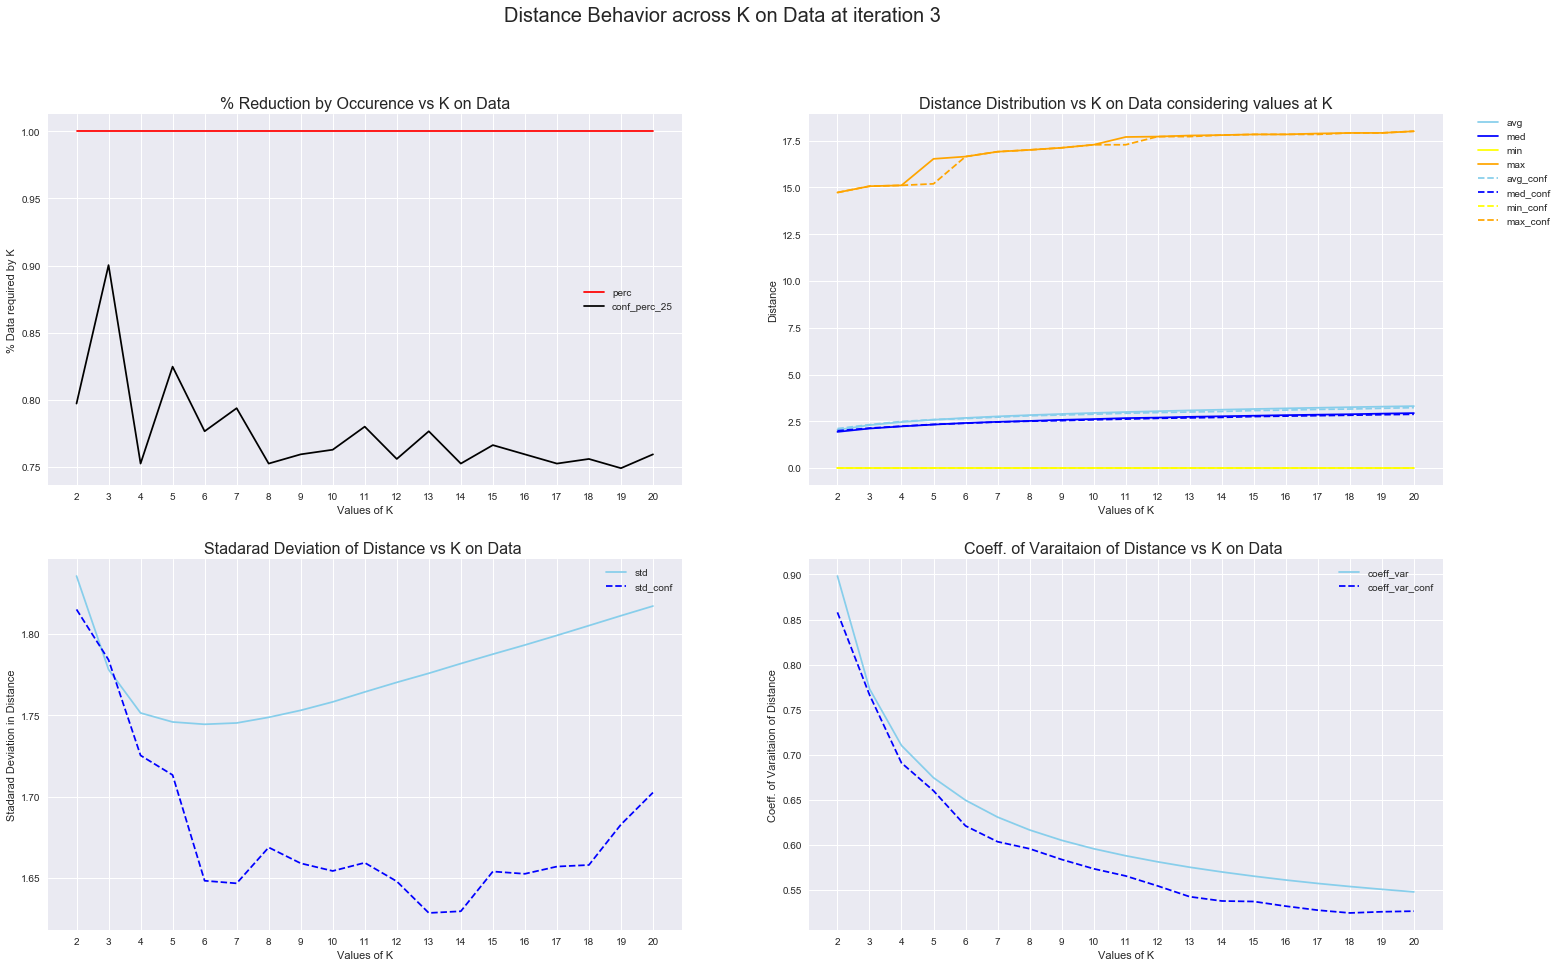

Iteration:  5 At:  2 Neigh Pts: 224 Confidence Neigh Pts: 174 (569, 2)
Iteration:  5 At:  3 Neigh Pts: 224 Confidence Neigh Pts: 182 (569, 3)
Iteration:  5 At:  4 Neigh Pts: 224 Confidence Neigh Pts: 174 (569, 4)
Iteration:  5 At:  5 Neigh Pts: 224 Confidence Neigh Pts: 190 (569, 5)
Iteration:  5 At:  6 Neigh Pts: 224 Confidence Neigh Pts: 170 (569, 6)
Iteration:  5 At:  7 Neigh Pts: 224 Confidence Neigh Pts: 168 (569, 7)
Iteration:  5 At:  8 Neigh Pts: 224 Confidence Neigh Pts: 174 (569, 8)
Iteration:  5 At:  9 Neigh Pts: 224 Confidence Neigh Pts: 169 (569, 9)
Iteration:  5 At: 10 Neigh Pts: 224 Confidence Neigh Pts: 174 (569, 10)
Iteration:  5 At: 11 Neigh Pts: 224 Confidence Neigh Pts: 171 (569, 11)
Iteration:  5 At: 12 Neigh Pts: 224 Confidence Neigh Pts: 169 (569, 12)
Iteration:  5 At: 13 Neigh Pts: 224 Confidence Neigh Pts: 170 (569, 13)
Iteration:  5 At: 14 Neigh Pts: 224 Confidence Neigh Pts: 172 (569, 14)
Iteration:  5 At: 15 Neigh Pts: 224 Confidence Neigh Pts: 168 (569, 15)


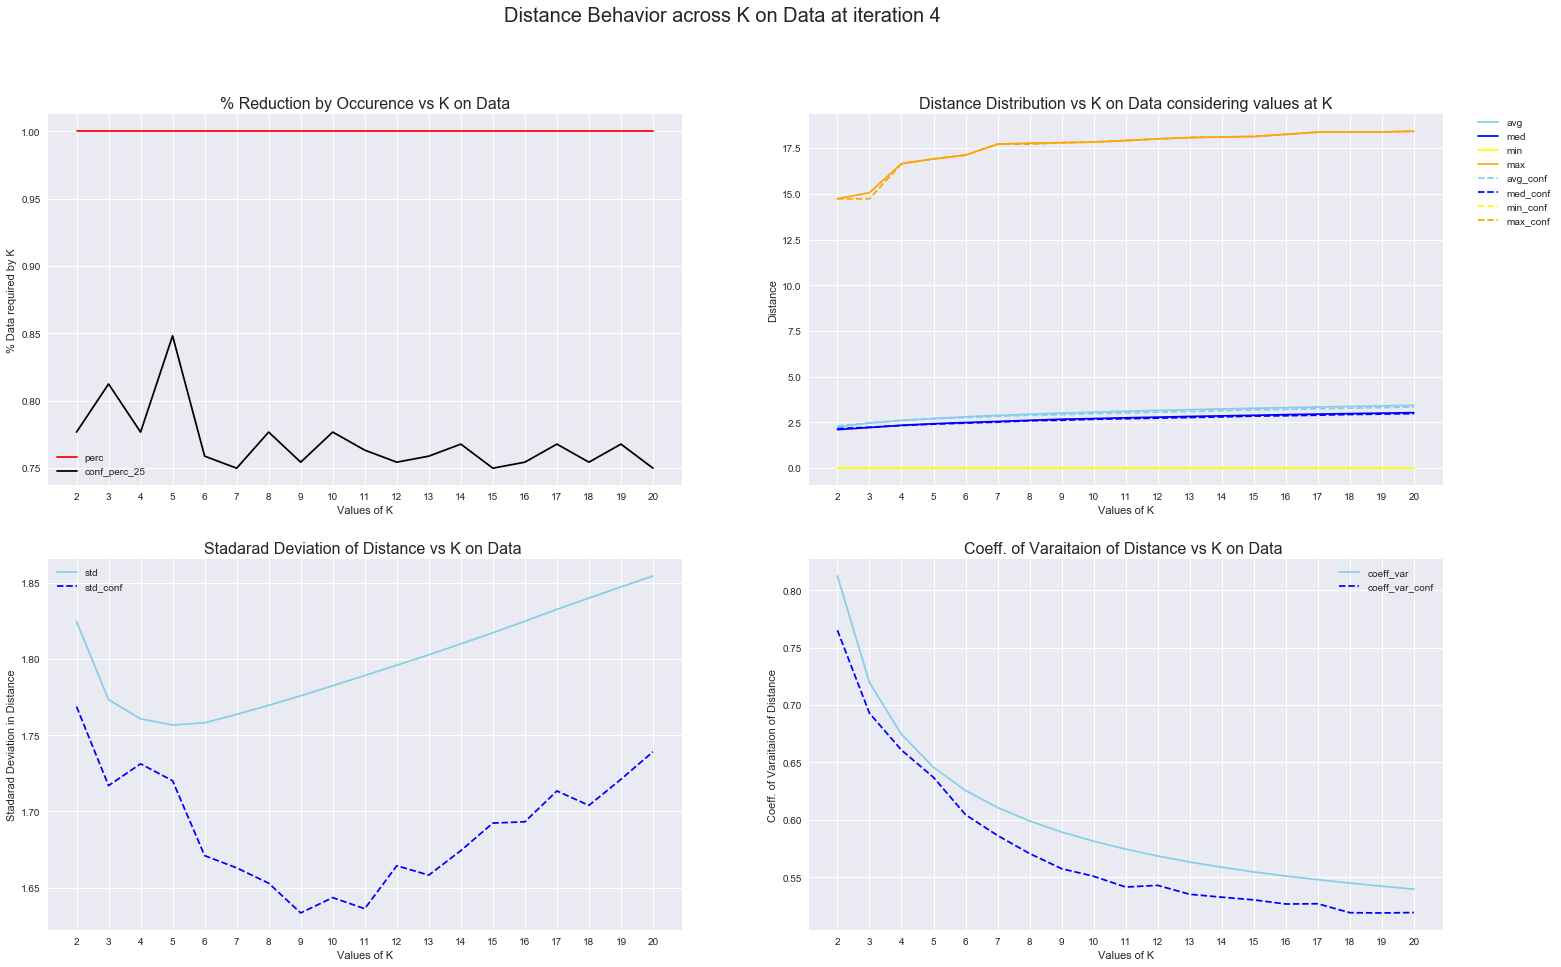

(182, 30)

In [35]:
conf_q=25; at_k=False; granual_k=5; maxit=5; max_k=21

valid_neigh = None
X_valid = X
for l in range(maxit):
    mod = NearestNeighbors(n_neighbors=(max_k+1), algorithm='ball_tree', n_jobs=-1).fit(X_valid)
    d_k, i_k = mod.kneighbors(X)
    perc = []
    d_desc = []
    i_conf_perc = []
    d_conf_desc = []
    n = X_valid.shape[0]
    for k in range(2,max_k):
        if X_valid.shape[0] == X.shape[0]:
            d = d_k[:,1:(k+1)].copy()
            i = i_k[:,1:(k+1)].copy()
        else:
            d = d_k[:,:k].copy()
            i = i_k[:,:k].copy()
        p = np.unique(i.flatten()).shape[0]
        perc.append(p/n)
        f = freq_count(i.flatten())
        q = f[:,1] >= np.percentile(f[:,1], q=conf_q)
        i_conf_perc.append(np.sum(q)/n)
        func_f = np.vectorize(lambda x: np.all(f[q] != x))
        print('Iteration: {:2d} At: {:2d} Neigh Pts: {} Confidence Neigh Pts: {} {}'.format(l+1,k,p,np.sum(q),d.shape))
        d_desc.append(get_scores(d[:,k-2] if at_k else d))
        np.place(d,func_f(i),np.nan)
        d_conf_desc.append(get_scores(d[:,k-2] if at_k else d,is_nan=True))
    i = i_k[:,1:(2+np.argmax(i_conf_perc))].copy()
    f = freq_count(i.flatten())
    q = f[:,1] >= np.percentile(f[:,1], q=conf_q)
    valid_neigh = f[q][:,0]
    X_valid = X_valid[valid_neigh,]
    print('At iteration: {:2d} Valid points: {:5d}'.format(l+1,X_valid.shape[0]))
    plot_k_dist(perc, i_conf_perc, d_desc, d_conf_desc, at_k=at_k, iteration=l)
    
X_valid.shape

In [41]:
granual_k = 15
mod = NearestNeighbors(n_neighbors=max_k, algorithm='ball_tree', n_jobs=-1).fit(X_valid)
d_granual, i_granual = mod.kneighbors(X_valid)
d_granual = d_granual[:,1:granual_k+1]
i_granual = i_granual[:,1:granual_k+1]
d_granual.shape,get_scores(d_granual)

((182, 15),
 (2.6990873432952216,
  0.856987661756905,
  1.0061149471356947,
  2.5015240578510376,
  6.978540697295378))

In [42]:
d_granual[:10,]

array([[2.67626057, 2.84346898, 2.98431622, 3.02552215, 3.18085611,
        3.24108484, 3.25042077, 3.31736387, 3.40984415, 3.42779104,
        3.44458107, 3.47713907, 3.53265843, 3.59641179, 3.6365094 ],
       [2.50285081, 2.69514461, 2.83739132, 2.94860028, 3.00350237,
        3.77330304, 3.79586997, 3.98526382, 4.01754126, 4.02054541,
        4.40634807, 4.42533011, 4.52075199, 4.9687189 , 4.99975745],
       [1.10097598, 1.80806174, 1.86557189, 1.89101756, 2.07393568,
        2.26556369, 2.31800576, 2.43827634, 3.11396255, 3.12854819,
        3.17037205, 3.24196762, 3.3339924 , 3.37345887, 3.39140015],
       [2.69514461, 2.76004493, 2.84170893, 2.85176446, 3.15628251,
        3.26032704, 3.45473084, 3.48122738, 3.79268397, 3.8087569 ,
        3.82900923, 3.8561915 , 4.22184843, 4.42174137, 4.73494521],
       [2.99278926, 3.2510238 , 3.26032704, 3.76207002, 3.79573925,
        3.95683335, 4.00460397, 4.05516281, 4.23492389, 4.35643576,
        4.38745642, 4.39830508, 4.40634807, 

In [85]:
d_perc = np.percentile(d_granual.flatten(),q = np.arange(0,110,10))
func_d_perc = np.vectorize(lambda x: np.searchsorted(d_perc,x))
func_d_perc(d_granual[:10,])

array([[ 6,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9],
       [ 6,  6,  7,  7,  8,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10],
       [ 1,  2,  2,  2,  3,  4,  4,  5,  8,  8,  8,  8,  9,  9,  9],
       [ 6,  7,  7,  7,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10],
       [ 8,  8,  8,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [ 4,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10],
       [ 6,  6,  7,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10],
       [ 8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10],
       [ 7,  7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10],
       [ 1,  2,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5]])

In [86]:
i_granual[:10,]

array([[ 11,  51, 153,  79,   8, 159,  62, 136, 127,  84,  73,  30,  48,
         25,  36],
       [ 13,   3,  66,  35, 163, 160,  10,  18, 158,  20,   4,  65,  21,
         55,   7],
       [ 92, 165,  72,  73,  58, 127,  79, 115,  98,  25,  53,  99, 153,
         16,  36],
       [  1, 163,  66,  13,  35,   4,  18, 160,   7,  10,  20,  21,  65,
        119,  55],
       [ 66,   7,   3, 160, 163,  55,  18,  13,  20,  65,  35, 119,   1,
         10,  19],
       [139,  73, 115,  62, 159, 103, 153,   2,  79,  78,  51, 118, 165,
         84,  68],
       [136,  36, 156,  48,  53,  62,  25, 171, 115,  38, 165,  30, 139,
         58, 127],
       [ 65,  18,   4,  78,  21, 163,  20, 119,  35,  54,  10,  98,   3,
         66,   8],
       [ 78, 153,  51,   0, 136, 159,  30,  84,  86,  62,  48,   7,  25,
         11,  79],
       [ 14, 149, 142, 155, 112, 174,  32,  27, 114,  56,  16,  23, 152,
        176,  77]])

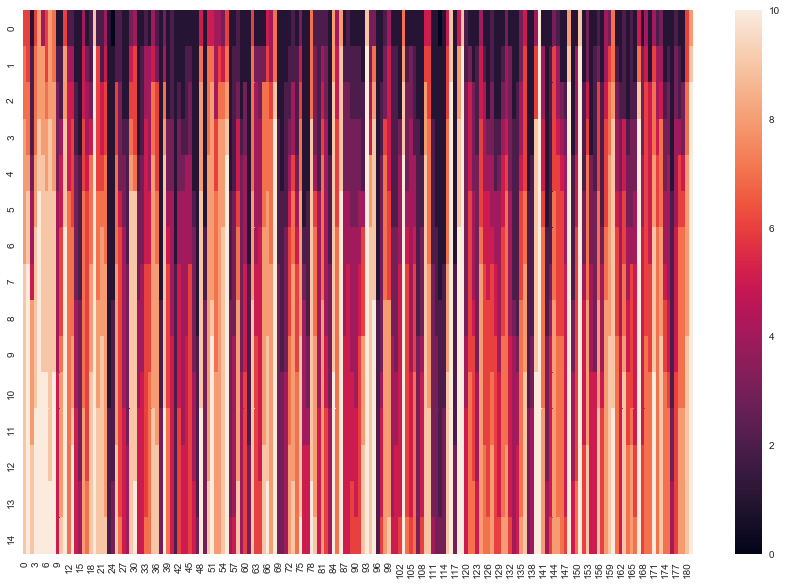

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(func_d_perc(d_granual).T)

In [93]:
perc_mask = np.where(func_d_perc(d_granual) ==1)
i_granual[perc_mask], perc_mask[0]

(array([ 92,  14,  65, 174,   9,  71, 108,  56,  47,  71,  41,  24,  96,
         61, 113,  56,  47, 114,  37, 117, 142,  23,  28, 117,  61,  47,
         70,  41, 176, 174, 112, 113,  24, 176,  76, 128, 122,  49, 112,
        146, 114, 111,  77,  96, 149, 137,  46,  23, 126, 164,  45,  23,
         70,  96,  49,  83, 113,  24, 102, 170, 117,  47, 142, 133,  39,
        149,  37, 152,  77, 114, 117,  23,  56, 142, 113, 129,  24,  43,
         15,  83,  96,  76, 128,  41,  31, 142,  23,  47, 114,  15,  59,
        168,  57, 166,  64, 102,  23,  96,  24, 107,  87, 113, 117, 150,
         60,  10, 137, 162, 164,  76,  41,  24, 154, 147,  15,  17,  92,
        112, 122,  31,  49,  70,  83, 128, 149,  37,  89, 111,  46,  49,
         96,  76,  41,  61,  77, 121, 108,   2,  72,  23,  49, 114,  61,
         37,  83,  41, 100, 133, 134,  96, 107,  42, 123,  60, 130, 147,
        154, 101,  61, 155,  15,  91, 133, 134,  37, 138,  77, 176, 157,
        138,  74,  32,  27,  28,  23,  47,  61, 117

In [136]:
perc_mask = np.where(func_d_perc(d_granual) <=3)
neigh_freq = freq_count(i_granual[perc_mask].flatten())
# print(neigh_freq[:5,:])
indices = neigh_freq[neigh_freq[:,1].argsort()[-5:][::-1],0]
# print(indices)
func_point_finder = np.vectorize(lambda x: np.any(indices==x))
print(neigh_freq[func_point_finder(neigh_freq[:,0]),:])
eff_point_dist = np.array((d_granual[func_point_finder(i_granual)],i_granual[func_point_finder(i_granual)],np.where(func_point_finder(i_granual))[0])).T
# print(eff_point_dist[func_point_finder(eff_point_dist[:,1]),:])
eff_point_dist,eff_point_dist.shape

[[23 26]
 [24 19]
 [61 18]
 [70 20]
 [96 23]]


(array([[  2.38390222,  23.        ,   9.        ],
        [  1.97131271,  96.        ,  15.        ],
        [  2.04995494,  23.        ,  15.        ],
        [  2.10230403,  61.        ,  15.        ],
        [  3.01376533,  24.        ,  16.        ],
        [  2.79770169,  70.        ,  17.        ],
        [  1.23044189,  24.        ,  23.        ],
        [  1.24846025,  96.        ,  23.        ],
        [  1.35288261,  61.        ,  23.        ],
        [  1.81770306,  70.        ,  23.        ],
        [  1.23044189,  23.        ,  24.        ],
        [  1.5127284 ,  61.        ,  24.        ],
        [  1.69879948,  70.        ,  24.        ],
        [  1.86037278,  96.        ,  24.        ],
        [  2.6451494 ,  24.        ,  26.        ],
        [  2.40469623,  24.        ,  27.        ],
        [  1.35130803,  24.        ,  28.        ],
        [  1.87218307,  23.        ,  28.        ],
        [  2.18194452,  61.        ,  28.        ],
        [  1

In [138]:
eff_point_dist[eff_point_dist[:,1]==indices[1],:].shape

(34, 3)

In [44]:
np.argsort(d_granual[:50,],axis=0)

array([[24, 24, 23, 23, 23, 37, 37, 23, 23, 23, 23, 23, 23, 23, 23],
       [ 2, 23, 24, 24, 24, 23, 23, 37, 47, 24, 41, 41, 41, 41, 41],
       [27, 49, 37, 37, 37, 47, 47, 47, 41, 41, 24, 47, 47, 47, 24],
       [41, 28, 49, 49, 47, 24, 24, 24, 24, 37, 47, 24, 24, 24, 37],
       [23, 37, 46, 47, 49, 41, 41, 41, 37, 47, 37, 37, 37, 37, 47],
       [49, 31, 47, 46, 46, 49, 49, 49, 49, 49, 49, 49, 15, 49, 49],
       [39, 46, 15, 41, 41, 15, 15, 15, 15, 15, 15, 15, 49, 28, 15],
       [31, 39, 41, 15, 15, 46, 28, 28, 28, 28, 28, 28, 28, 15, 28],
       [28, 47, 28, 31, 31, 28, 31, 31, 46, 46, 46, 46, 46, 46, 46],
       [37, 15, 31, 14, 28, 31, 46, 46, 31, 14, 14, 43, 14, 14, 14],
       [46, 41, 43, 28, 27, 27, 14, 14, 14, 43, 43, 14, 43, 40,  9],
       [43, 14, 39,  2, 14, 32, 32, 32, 32, 32, 31, 40, 40,  9, 40],
       [14, 27, 27, 27,  2, 14, 45, 40,  9, 31, 27, 27,  9, 27, 43],
       [15, 42, 14, 44, 26,  9, 40, 43, 43,  9,  9,  9, 27, 43, 31],
       [47, 43, 32, 32, 32, 40, 43

In [45]:
d_r = np.array([np.arange(21),np.arange(0,105,5),np.percentile(d_granual.flatten(),q = np.arange(0,105,5))]).T
d_r

array([[  0.        ,   0.        ,   1.00611495],
       [  1.        ,   5.        ,   1.61964958],
       [  2.        ,  10.        ,   1.78467265],
       [  3.        ,  15.        ,   1.92517881],
       [  4.        ,  20.        ,   2.03344683],
       [  5.        ,  25.        ,   2.12234046],
       [  6.        ,  30.        ,   2.1949438 ],
       [  7.        ,  35.        ,   2.27072648],
       [  8.        ,  40.        ,   2.34474329],
       [  9.        ,  45.        ,   2.42255796],
       [ 10.        ,  50.        ,   2.50152406],
       [ 11.        ,  55.        ,   2.61585503],
       [ 12.        ,  60.        ,   2.73517057],
       [ 13.        ,  65.        ,   2.84320497],
       [ 14.        ,  70.        ,   2.98431622],
       [ 15.        ,  75.        ,   3.12759702],
       [ 16.        ,  80.        ,   3.2841095 ],
       [ 17.        ,  85.        ,   3.52416883],
       [ 18.        ,  90.        ,   3.85563333],
       [ 19.        ,  95.     

In [46]:
i_d = np.vstack((np.repeat(np.arange(X_valid.shape[0]),granual_k),i_granual.flatten(),d_granual.flatten())).T

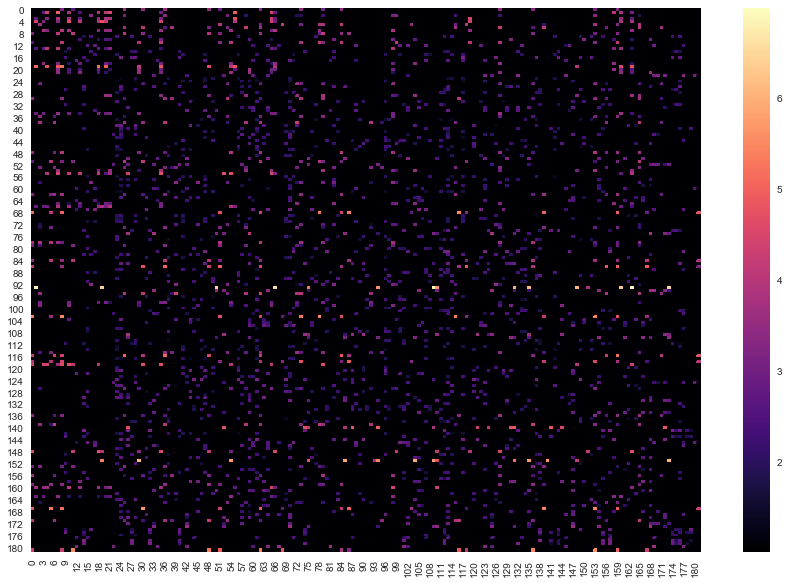

In [47]:
i_d_sparse = sparse.coo_matrix((d_granual.flatten(), (np.repeat(np.arange(X_valid.shape[0]),granual_k), i_granual.flatten())))
plt.figure(figsize=(15,10))
sns.heatmap(i_d_sparse.toarray(),vmin = np.min(d_granual),cmap="magma")

2730.0


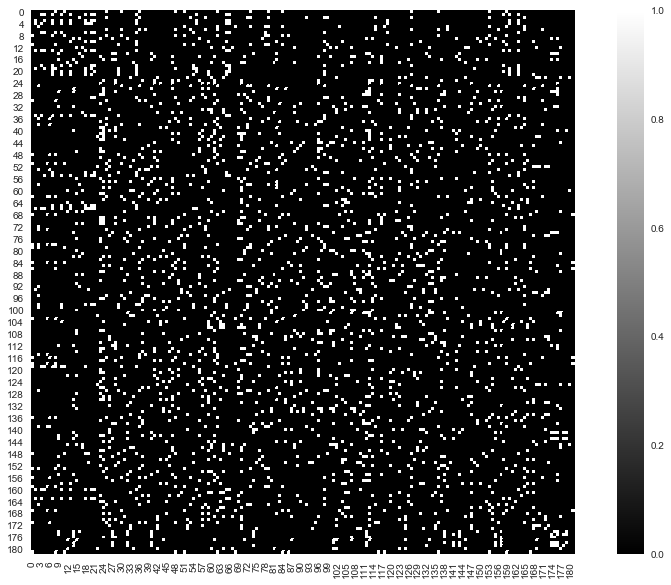

In [48]:
mask = np.ones_like(i_d_sparse.toarray())
# func_mask = np.vectorize(lambda x: (x == 0) or (x > d_r[16,1]) or (x <= d_r[0,1]))
func_mask = np.vectorize(lambda x: (x == 0))
mask[func_mask(i_d_sparse.toarray())] = 0
print(np.sum(mask))
plt.figure(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(data=mask, square=True,cmap='gist_gray')

In [49]:
np.sum(i_d[:,2] > 0)

2730

In [50]:
mask = np.ones_like(i_d_sparse.toarray())
func_mask = np.vectorize(lambda x: (x == 0) or (x > d_r[16,1]) or (x <= d_r[0,1]))
mask[func_mask(i_d_sparse.toarray())] = 0
print(np.sum(mask))

2730.0


In [42]:
def freq_score_old(transaction_matrix):
    frequent_items_matrix = np.zeros_like(transaction_matrix)
    # get number of rows and columns
    rows, columns = transaction_matrix.shape
    # compare every product with every other
    for this_column in range(0, columns-1):
        for next_column in range(this_column + 1, columns):
            # multiply product pair vectors
            product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
            # check the number of pair occurrences in baskets
            count_matches = np.sum(product_vector > 0)
            # save values to new matrix
            frequent_items_matrix[this_column,next_column] = count_matches
    return frequent_items_matrix
        
def freq_score(transaction_matrix):
    frequent_items_matrix = np.zeros_like(transaction_matrix)
    # get number of rows and columns
    rows, columns = transaction_matrix.shape
    # compare every product with every other
    for this_column in range(0, columns-1):
        for next_column in range(this_column + 1, columns):
            # sum of product pair vectors
            product_vector = np.sum(transaction_matrix[:,[this_column,next_column]],axis=1)
            # check the number of pair occurrences in baskets
            count_matches = np.sum(product_vector == 2)
            # save values to new matrix
            frequent_items_matrix[this_column,next_column] = count_matches
    return frequent_items_matrix

In [43]:
@numba.jit
def freq_score_numba(transaction_matrix):
    frequent_items_matrix = np.zeros_like(transaction_matrix)
    # get number of rows and columns
    rows, columns = transaction_matrix.shape
    # compare every product with every other
    for this_column in range(0, columns-1):
        for next_column in range(this_column + 1, columns):
            # multiply product pair vectors
            product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
            # check the number of pair occurrences in baskets
            count_matches = np.sum(product_vector > 0)
            # save values to new matrix
            frequent_items_matrix[this_column,next_column] = count_matches
    return frequent_items_matrix

In [45]:
# mask2 = i_d_sparse.toarray()
start = timer()
freq_set = freq_score_old(mask)
end =timer()
print('time:{}'.format(end-start))
start = timer()
freq_set = freq_score(mask)
end =timer()
print('time:{}'.format(end-start))
start = timer()
freq_set = freq_score_numba(mask)
end =timer()
print('time:{}'.format(end-start))

time:0.3147966430001361
time:0.5237663010000233
time:0.023395431999915672


In [46]:
%prun freq_set = freq_score_numba(mask)

         4 function calls in 0.025 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.025    0.025    0.025    0.025 <ipython-input-43-4bcb2675ccc3>:1(freq_score_numba)
        1    0.000    0.000    0.025    0.025 <string>:1(<module>)
        1    0.000    0.000    0.025    0.025 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [47]:
%prun freq_set = freq_score_old(mask)

         112820 function calls in 0.316 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.189    0.189    0.316    0.316 <ipython-input-42-7d760976b70c>:1(freq_score_old)
    28203    0.076    0.000    0.076    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    28203    0.038    0.000    0.127    0.000 fromnumeric.py:1778(sum)
    28203    0.007    0.000    0.083    0.000 _methods.py:31(_sum)
    28203    0.006    0.000    0.006    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.copyto}
        1    0.000    0.000    0.316    0.316 <string>:1(<module>)
        1    0.000    0.000    0.316    0.316 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 numeric.py:83(zeros_like)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.empty_like}
        1    0.000    0.000    0.00

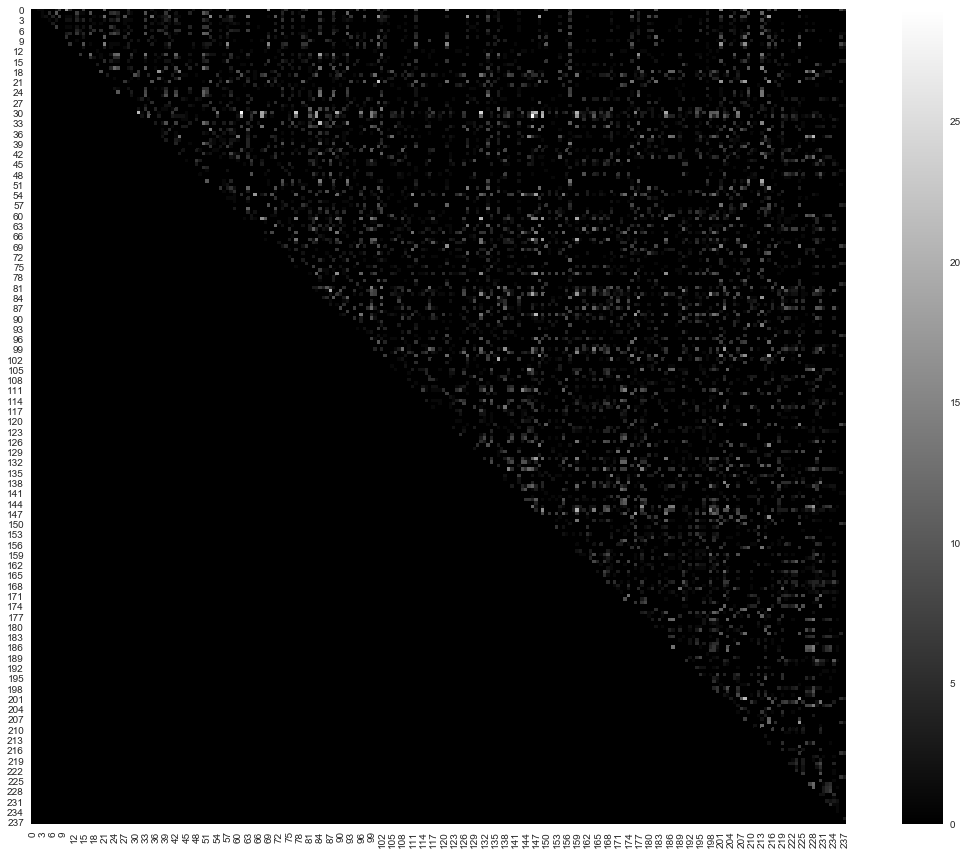

In [48]:
plt.figure(figsize=(20,15))
with sns.axes_style("white"):
    ax = sns.heatmap(data=freq_set, square=True,cmap='gist_gray')

In [49]:
np.sum(freq_set),get_scores(freq_set)

(24990.0, (0.4411764705882353, 1.686298356383309, 0.0, 0.0, 29.0))

In [89]:
def extract_pairs(frequency_table,treshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequency_table >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
#     print(row_coords)
#     print(np.sort(column_coords))
    
#     print(freq_count(row_coords))
#     print(freq_count(column_coords))
    # getting pairs
    
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
#         first_product = product_names[row]
#         second_product = product_names[column]
        first_product = row
        second_product = column
        
        # number of basket matches
        matches = frequency_table[row,column]
        # put key values into dict
        output['{}-{}'.format(first_product,second_product)] = matches
    
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
    
# plot pairs with minimum frequency of 2 basket matches
min_frequency = 30
pairs = extract_pairs(freq_set,min_frequency)


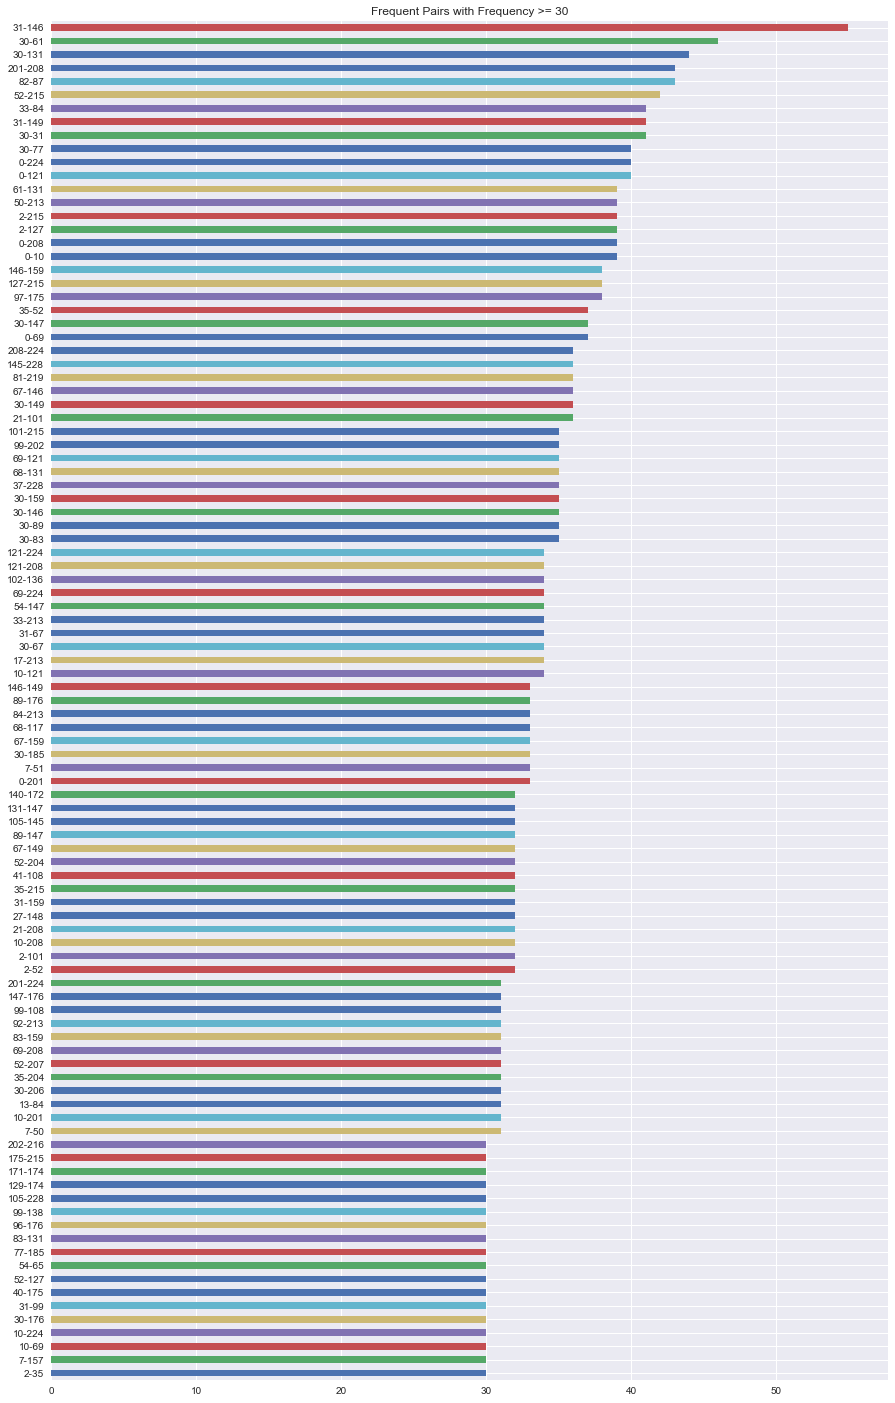

In [90]:
plt.figure(figsize=(15,25))
pd.Series(pairs).plot(kind="barh", title="Frequent Pairs with Frequency >= " + str(min_frequency))

In [54]:
granual_k = 15
mod = NearestNeighbors(n_neighbors=max_k, algorithm='kd_tree', n_jobs=-1).fit(X_valid)

In [55]:
d_granual, i_granual = mod.kneighbors(X)
d_granual = d_granual[:,:granual_k]
i_granual = i_granual[:,:granual_k]
d_r = np.array([np.arange(21),np.arange(0,105,5),np.percentile(d_granual.flatten(),q = np.arange(0,105,5))]).T
d_granual.shape,get_scores(d_granual),d_r

((569, 15),
 (8.921599533770834,
  4.504146072865536,
  0.0,
  8.040058570009345,
  38.00461819210636),
 array([[  0.        ,   0.        ,   0.        ],
        [  1.        ,   5.        ,   4.32522145],
        [  2.        ,  10.        ,   5.17343232],
        [  3.        ,  15.        ,   5.60736633],
        [  4.        ,  20.        ,   5.98550904],
        [  5.        ,  25.        ,   6.34765189],
        [  6.        ,  30.        ,   6.67902306],
        [  7.        ,  35.        ,   6.99173018],
        [  8.        ,  40.        ,   7.33029842],
        [  9.        ,  45.        ,   7.68601203],
        [ 10.        ,  50.        ,   8.04005857],
        [ 11.        ,  55.        ,   8.4263427 ],
        [ 12.        ,  60.        ,   8.83339391],
        [ 13.        ,  65.        ,   9.28897964],
        [ 14.        ,  70.        ,   9.77638072],
        [ 15.        ,  75.        ,  10.37055264],
        [ 16.        ,  80.        ,  11.09127395],
        [ 17

In [56]:
i_granual.flatten().shape,i_granual

((8535,), array([[ 74,  47,  15, ..., 150,  51, 224],
        [148,  27,   2, ..., 207,  21, 182],
        [  0, 224, 201, ..., 150, 207,  40],
        ...,
        [109,  43, 154, ..., 104,  42,  18],
        [237,  74,  80, ...,  95, 217, 112],
        [170, 235, 123, ...,  22, 144, 139]]))

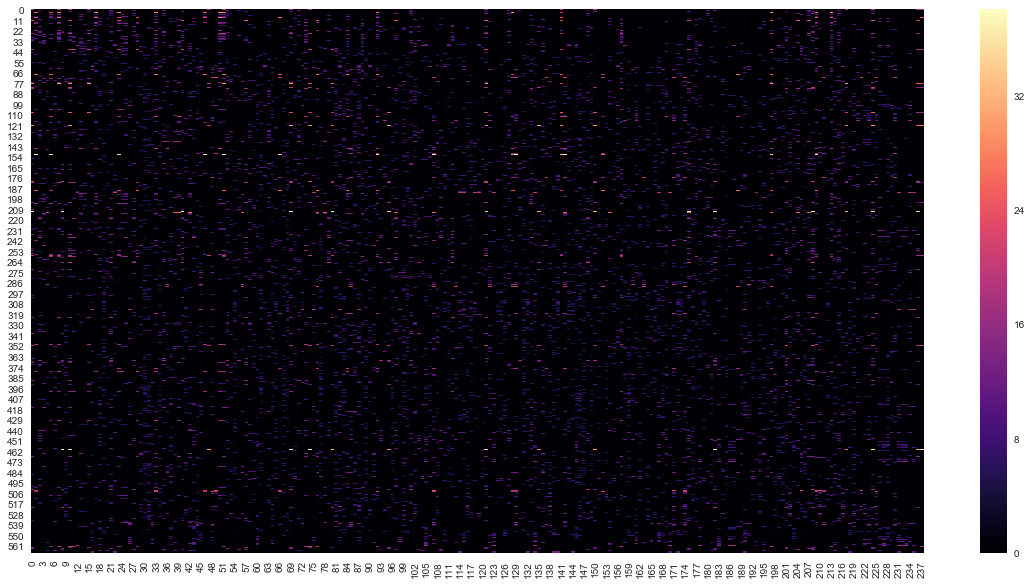

In [57]:
i_d_sparse = sparse.coo_matrix((d_granual.flatten(), (np.repeat(np.arange(X.shape[0]),granual_k), i_granual.flatten())))
plt.figure(figsize=(20,10))
sns.heatmap(i_d_sparse.toarray(),vmin = np.min(d_granual),cmap="magma")

8297.0


(569, 238)

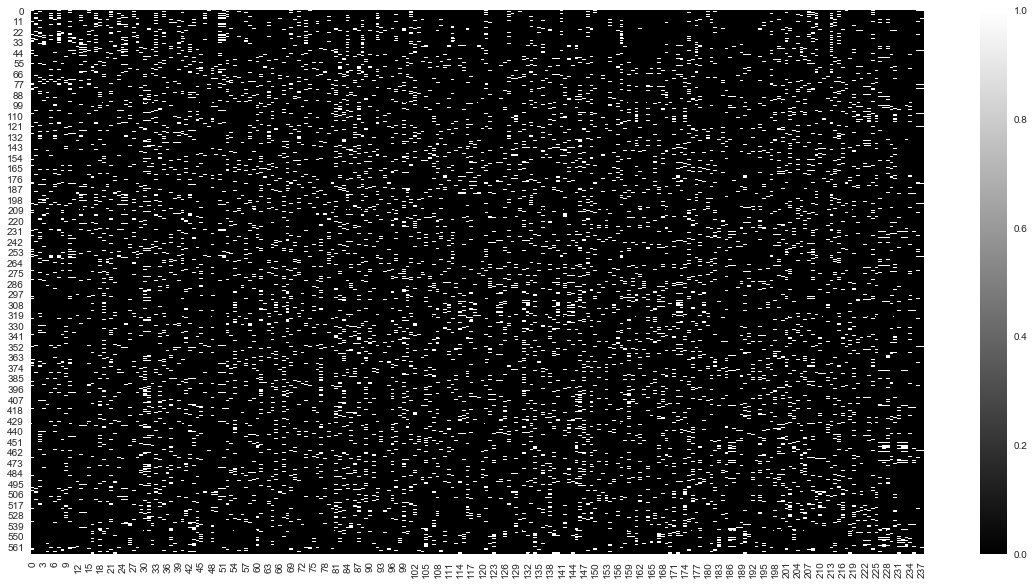

In [58]:
mask = np.ones_like(i_d_sparse.toarray())
# func_mask = np.vectorize(lambda x: (x == 0) or (x > d_r[16,1]) or (x <= d_r[0,1]))
func_mask = np.vectorize(lambda x: (x == 0))
mask[func_mask(i_d_sparse.toarray())] = 0
print(np.sum(mask))
plt.figure(figsize=(20,10))
with sns.axes_style("white"):
    ax = sns.heatmap(data=mask,cmap='gist_gray')
mask.shape

(0.061267740839745385, 0.2398207763563015, 0.0, 0.0, 1.0)


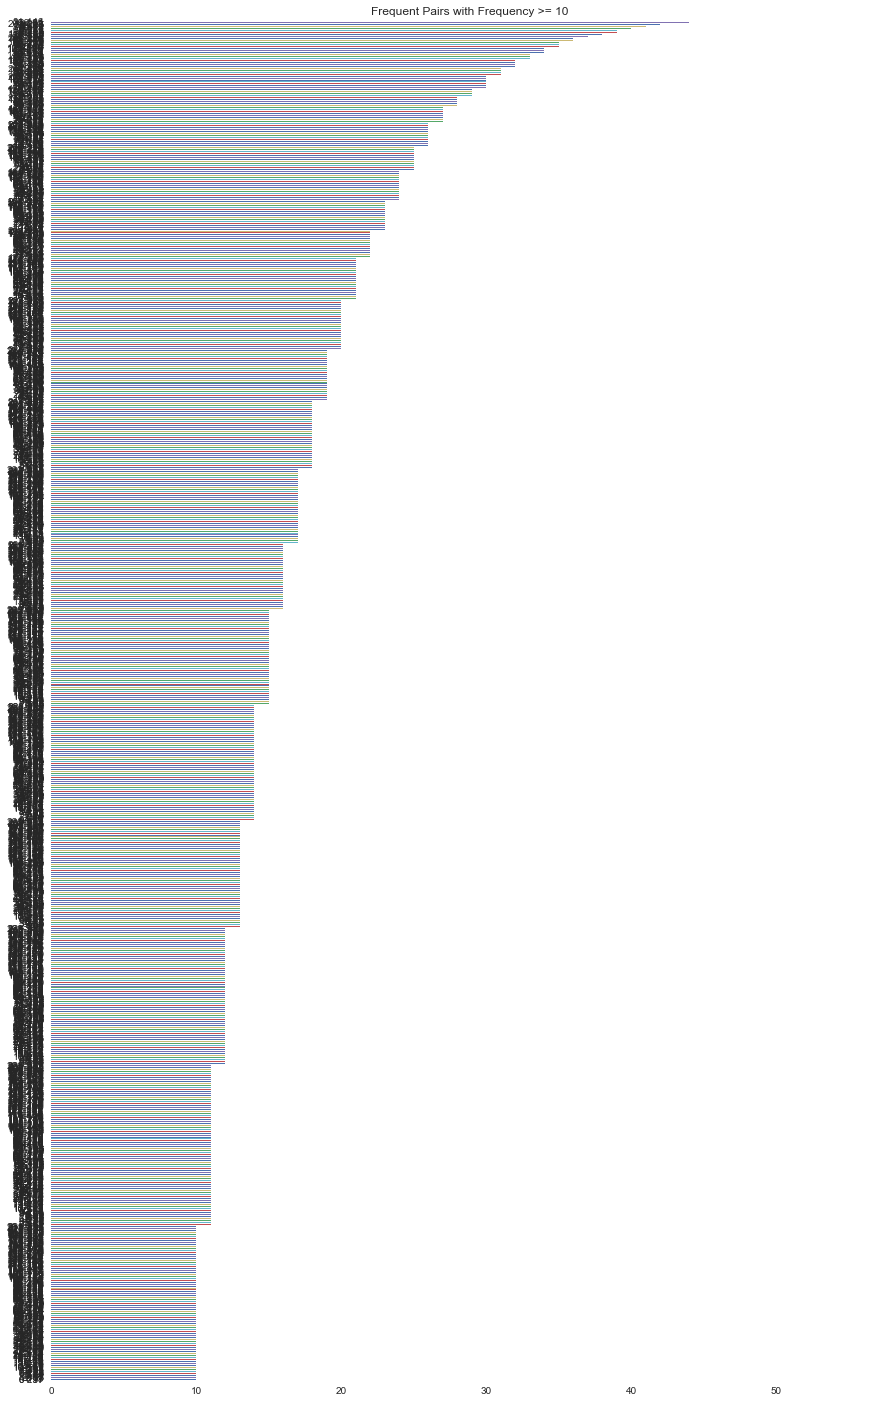

In [59]:
freq_set = freq_score_numba(mask)
print(get_scores(mask))
pairs = extract_pairs(freq_set,treshold=10)
plt.figure(figsize=(15,25))
pd.Series(pairs).plot(kind="barh", title="Frequent Pairs with Frequency >= " + str(min_frequency))

In [60]:
def extract_pairs(frequency_table,treshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequency_table >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    print(row_coords)
    print(np.sort(column_coords))
    
    print(freq_count(row_coords))
    print(freq_count(column_coords))
    # getting pairs
    
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
#         first_product = product_names[row]
#         second_product = product_names[column]
        first_product = row
        second_product = column
        
        # number of basket matches
        matches = frequency_table[row,column]
        # put key values into dict
        output['{}-{}'.format(first_product,second_product)] = matches
    
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output

In [61]:
matrix_coord_list = np.where(freq_set >= 20)
# take values
row_coords = matrix_coord_list[0]
column_coords = matrix_coord_list[1]
print(row_coords)
print(column_coords)

print(freq_count(row_coords))
print(freq_count(column_coords))


[  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   2
   2   2   2   2   2   2   2   2   2   2   2   2   5   5   5   5   7   7
   7   7   7   8   8   9  10  10  10  10  10  10  10  10  10  10  10  13
  13  13  13  13  13  13  13  16  17  17  17  17  17  17  17  18  18  18
  18  18  18  19  19  19  19  20  21  21  21  21  21  21  21  21  21  21
  21  21  21  23  24  24  24  24  25  25  25  25  25  27  27  27  27  29
  29  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
  30  30  30  31  31  31  31  31  31  31  31  31  31  31  31  31  31  33
  33  33  33  33  34  34  34  34  35  35  35  35  35  35  35  35  35  35
  35  37  37  37  37  37  39  39  40  40  40  41  41  41  41  41  42  43
  43  45  45  45  48  50  50  50  50  50  50  50  51  51  51  52  52  52
  52  52  52  52  52  52  52  52  52  54  54  54  54  54  54  54  54  57
  57  57  57  57  58  58  58  58  59  60  61  61  61  61  61  61  61  61
  61  61  61  61  63  63  63  63  64  64  64  64  6

In [62]:
freq_row = freq_count(row_coords)
freq_row = freq_row[np.argsort(-freq_row[:,1]),]

In [63]:
np.sum(freq_set[np.where(freq_set>30)])

2930.0

In [64]:
ffs=freq_count(freq_set.astype(np.int).flatten())
np.sum(ffs[ffs[:,0]>0,1]),ffs

(8711, array([[     0, 126711],
        [     1,   1922],
        [     2,   1246],
        [     3,    833],
        [     4,    657],
        [     5,    571],
        [     6,    457],
        [     7,    379],
        [     8,    330],
        [     9,    273],
        [    10,    232],
        [    11,    242],
        [    12,    206],
        [    13,    160],
        [    14,    174],
        [    15,    145],
        [    16,     98],
        [    17,    112],
        [    18,    103],
        [    19,     78],
        [    20,     74],
        [    21,     64],
        [    22,     41],
        [    23,     44],
        [    24,     44],
        [    25,     37],
        [    26,     35],
        [    27,     24],
        [    28,     16],
        [    29,     13],
        [    30,     18],
        [    31,     12],
        [    32,     14],
        [    33,      8],
        [    34,     10],
        [    35,      9],
        [    36,      6],
        [    37,      3],
      

In [65]:
np.percentile(ffs[:,1],q=50)

44.0

In [61]:
te = TransactionEncoder()
te_ary = te.fit(i_granual).transform(i_granual)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [63]:
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True, n_jobs=-1)
frequent_itemsets

,support,itemsets
0,0.126374,(0)
1,0.049451,(1)
2,0.104396,(2)
3,0.054945,(3)
4,0.049451,(4)
5,0.065934,(5)
6,0.054945,(6)
7,0.093407,(7)
8,0.115385,(8)
9,0.065934,(9)


In [66]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(5),0.126374,0.065934,0.049451,0.391304,5.934783,0.041118,1.534537
1,(5),(0),0.065934,0.126374,0.049451,0.750000,5.934783,0.041118,3.494505
2,(0),(6),0.126374,0.054945,0.032967,0.260870,4.747826,0.026023,1.278604
3,(6),(0),0.054945,0.126374,0.032967,0.600000,4.747826,0.026023,2.184066
4,(0),(8),0.126374,0.115385,0.098901,0.782609,6.782609,0.084320,4.069231
5,(8),(0),0.115385,0.126374,0.098901,0.857143,6.782609,0.084320,6.115385
6,(0),(11),0.126374,0.049451,0.043956,0.347826,7.033816,0.037707,1.457509
7,(11),(0),0.049451,0.126374,0.043956,0.888889,7.033816,0.037707,7.862637
8,(0),(25),0.126374,0.109890,0.054945,0.434783,3.956522,0.041058,1.574810
9,(25),(0),0.109890,0.126374,0.054945,0.500000,3.956522,0.041058,1.747253


In [68]:
i_granual[:10,]

array([[ 11,  51, 153,  79,   8, 159,  62, 136, 127,  84,  73,  30,  48,
         25,  36],
       [ 13,   3,  66,  35, 163, 160,  10,  18, 158,  20,   4,  65,  21,
         55,   7],
       [ 92, 165,  72,  73,  58, 127,  79, 115,  98,  25,  53,  99, 153,
         16,  36],
       [  1, 163,  66,  13,  35,   4,  18, 160,   7,  10,  20,  21,  65,
        119,  55],
       [ 66,   7,   3, 160, 163,  55,  18,  13,  20,  65,  35, 119,   1,
         10,  19],
       [139,  73, 115,  62, 159, 103, 153,   2,  79,  78,  51, 118, 165,
         84,  68],
       [136,  36, 156,  48,  53,  62,  25, 171, 115,  38, 165,  30, 139,
         58, 127],
       [ 65,  18,   4,  78,  21, 163,  20, 119,  35,  54,  10,  98,   3,
         66,   8],
       [ 78, 153,  51,   0, 136, 159,  30,  84,  86,  62,  48,   7,  25,
         11,  79],
       [ 14, 149, 142, 155, 112, 174,  32,  27, 114,  56,  16,  23, 152,
        176,  77]])

In [66]:
matrix_coord_list = np.where(freq_set >= 20)
# take values
row_coords = matrix_coord_list[0]
col_coords = matrix_coord_list[1]
freq_row = freq_count(row_coords)
freq_col = freq_count(col_coords)

G = nx.Graph()
G.add_nodes_from(row_coords)
G.add_nodes_from(column_coords)
for i,v in enumerate(row_coords):
    row = row_coords[i]
    col = col_coords[i]
    support = freq_set[row,col] / (freq_row[np.where(freq_row[:,0]==row),1][0][0] * freq_col[np.where(freq_col[:,0]==col),1][0][0])
#     print('r: {:3d} f_r:{:3d} c: {:3d} f_c:{:3d} s: {}'.format(row,freq_row[np.where(freq_row[:,0]==row),1][0][0],col,freq_col[np.where(freq_col[:,0]==col),1][0][0],support))
    G.add_edge(row, col, length=support)

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


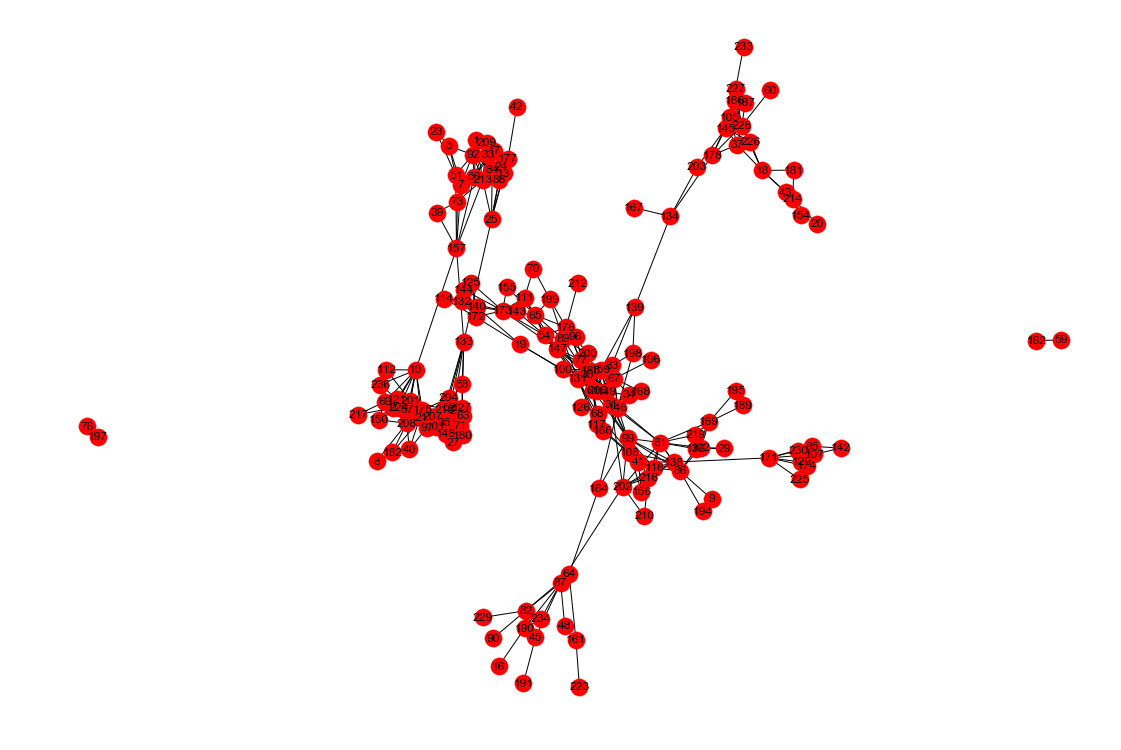

In [67]:
plt.figure(figsize=(15,10))
nx.draw(G, with_labels=True)

In [193]:
G.degree()

DegreeView({0: 17, 1: 5, 2: 8, 3: 6, 4: 2, 5: 2, 6: 4, 7: 4, 8: 10, 10: 8, 13: 8, 14: 6, 15: 2, 16: 1, 18: 11, 19: 1, 20: 8, 21: 7, 23: 16, 24: 12, 25: 7, 26: 2, 27: 6, 28: 3, 29: 1, 30: 3, 31: 3, 32: 2, 34: 3, 35: 13, 36: 11, 37: 12, 39: 4, 40: 1, 41: 7, 42: 3, 43: 2, 44: 1, 45: 3, 46: 4, 47: 5, 48: 4, 49: 6, 50: 1, 51: 6, 52: 2, 53: 2, 54: 5, 56: 5, 57: 2, 58: 7, 59: 13, 60: 6, 61: 7, 62: 17, 63: 2, 64: 9, 65: 7, 66: 9, 69: 2, 70: 14, 72: 5, 73: 9, 74: 7, 75: 5, 76: 5, 77: 5, 78: 3, 79: 6, 80: 2, 82: 7, 83: 3, 84: 9, 85: 1, 86: 4, 92: 6, 94: 5, 96: 13, 97: 4, 98: 3, 99: 1, 100: 1, 101: 6, 102: 5, 104: 8, 105: 5, 106: 2, 108: 1, 110: 6, 111: 6, 112: 11, 113: 10, 114: 9, 115: 5, 116: 2, 120: 3, 123: 5, 126: 2, 127: 12, 130: 5, 131: 5, 135: 6, 136: 14, 137: 10, 138: 7, 139: 1, 143: 3, 149: 2, 153: 12, 154: 8, 157: 5, 159: 15, 160: 4, 161: 2, 174: 5, 175: 2, 181: 4, 165: 16, 163: 14, 176: 12, 148: 1, 117: 9, 142: 4, 156: 5, 164: 2, 172: 1, 166: 4, 168: 6, 150: 1, 147: 3, 173: 5, 133: 5, 

In [ ]:
nx.degree_histogram(G)

In [70]:
len(list(nx.community.k_clique_communities(G,5))),list(nx.community.k_clique_communities(G,5))

(11,
 [frozenset({0,
             2,
             10,
             21,
             27,
             35,
             52,
             57,
             63,
             69,
             71,
             97,
             101,
             121,
             127,
             133,
             148,
             150,
             175,
             180,
             201,
             204,
             207,
             208,
             215,
             224,
             236}),
  frozenset({1, 13, 17, 24, 25, 33, 50, 84, 88, 92, 177, 209, 213}),
  frozenset({7, 50, 51, 92, 157, 213}),
  frozenset({30, 54, 65, 89, 96, 131, 147, 176}),
  frozenset({30, 31, 34, 61, 67, 83, 99, 131, 146, 149, 159, 185, 206}),
  frozenset({30, 61, 77, 131, 147, 185}),
  frozenset({37, 105, 145, 178, 228}),
  frozenset({81, 99, 116, 138, 202, 216}),
  frozenset({81, 102, 136, 169, 219}),
  frozenset({85, 107, 129, 171, 174}),
  frozenset({105, 145, 186, 187, 227, 228})])

In [71]:
l = list(nx.community.girvan_newman(G))

In [75]:
print(len(l))


159


In [73]:
l_k = list(nx.community.kernighan_lin_bisection(G,weight='length'))


/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


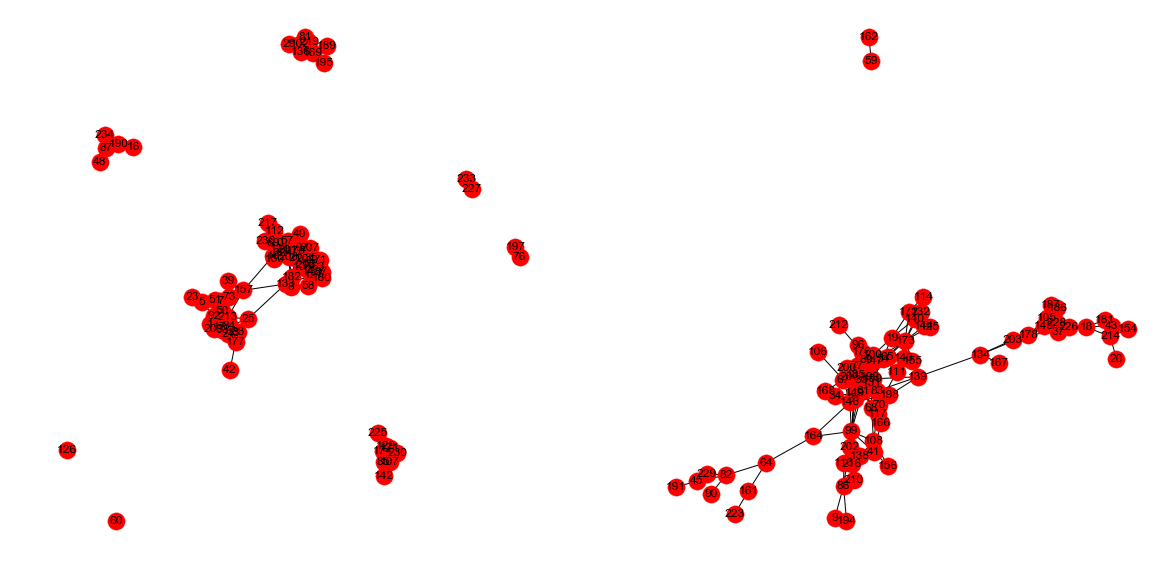

In [74]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
nx.draw(nx.subgraph(G,l_k[0]), with_labels=True)
plt.subplot(1,2,2)
nx.draw(nx.subgraph(G,l_k[1]), with_labels=True)


In [85]:
G_2=nx.subgraph(G,l_k[0])

In [86]:
list(nx.connected_components(G_2))

[{0,
  1,
  2,
  5,
  7,
  8,
  10,
  13,
  17,
  21,
  23,
  24,
  25,
  27,
  33,
  35,
  39,
  40,
  42,
  50,
  51,
  52,
  57,
  58,
  63,
  69,
  71,
  73,
  84,
  88,
  92,
  97,
  101,
  112,
  121,
  127,
  133,
  148,
  150,
  157,
  175,
  177,
  180,
  182,
  201,
  204,
  207,
  208,
  209,
  213,
  215,
  217,
  224,
  236},
 {85, 107, 129, 142, 171, 174, 225, 230},
 {29, 81, 102, 136, 169, 189, 195, 219},
 {16, 48, 87, 190, 234},
 {60},
 {76, 197},
 {227, 233},
 {126}]

In [243]:
# # to be thought
# class bptree(object):
    
#     def __init__(self, parent=None, children = None, depth = 0):
#         self.parent = parent
#         self.children = children
#         self.data = None
#         self.depth = depth

# tree = bptree()
# for i in range(4):
#     if tree.children is None:
#         tree.data = list(G.nodes())
#         child = []
#         for c in list(nx.community.kernighan_lin_bisection(G,weight='length')):
#             c_tree = bptree(parent=tree,children=None,depth=i+1)
#             c_tree.data = c
#             child.append(c_tree)
#         tree.children = child
#         tree.depth = i
# #     else:
# #         for l in tree.children:
            